In [33]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import metrics

In [34]:
data = datasets.load_digits()

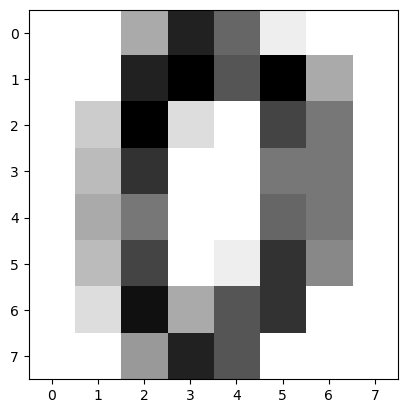

In [35]:
plt.subplots()
plt.imshow(data.images[0] , cmap = plt.cm.gray_r)

In [36]:
data.target[0]

0

In [37]:
images_and_labels = list(zip(data.images, data.target))

In [38]:
images_and_labels[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

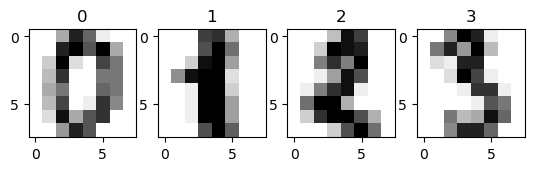

In [39]:
for i , (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2,4,i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)
    

In [40]:
np.shape(data.images)

(1797, 8, 8)

In [41]:
X = data.images.reshape(len(data.images) , -1)
np.shape(X)

(1797, 64)

In [42]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [43]:
y=data.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [44]:
scm_classifier = SVC(random_state=3432 , C=.5)

In [45]:
scm_classifier.fit(X[:1000] , y[:1000])

SVC(C=0.5, random_state=3432)

In [46]:

p = scm_classifier.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e,p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.97      0.91      0.94        80
           2       1.00      0.96      0.98        77
           3       0.97      0.84      0.90        79
           4       0.99      0.95      0.97        83
           5       0.90      0.99      0.94        82
           6       0.99      0.99      0.99        80
           7       0.92      0.99      0.95        80
           8       0.94      0.95      0.94        76
           9       0.88      0.95      0.91        81

    accuracy                           0.95       797
   macro avg       0.95      0.95      0.95       797
weighted avg       0.95      0.95      0.95       797



In [47]:
cm = metrics.confusion_matrix(e, p)

labels = [str(i) for i in range(len(cm))]

fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=labels,
    y=labels,
    text=cm, 
    texttemplate="%{text}", 
    textfont={"size": 16},
    hoverongaps=False,
    colorscale='Blues',  
    showscale=True
))

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    width=700,
    height=700,
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
)


fig.update_yaxes(autorange="reversed")

fig.show()